In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

intreday_omega = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\intraday\\omega"
daily_omega = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\daily\\omega"

intraday_mstock = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\intraday\\mstock"
daily_mstock = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\daily\\mstock"

In [2]:
def get_dataframes(data_dir):
    dataframes = dict()
    #dataframes = []
    for filename in os.listdir(data_dir):
        path = os.path.join(data_dir, filename)
        df = pd.read_csv(path, delimiter=',', header=0)
        dataframes[filename.replace('.prn', '')] = df
        #dataframes.append(df)
    return dataframes

5904


Text(0.5, 1.0, 'Return correlations for entries with 5000 or more daily records')

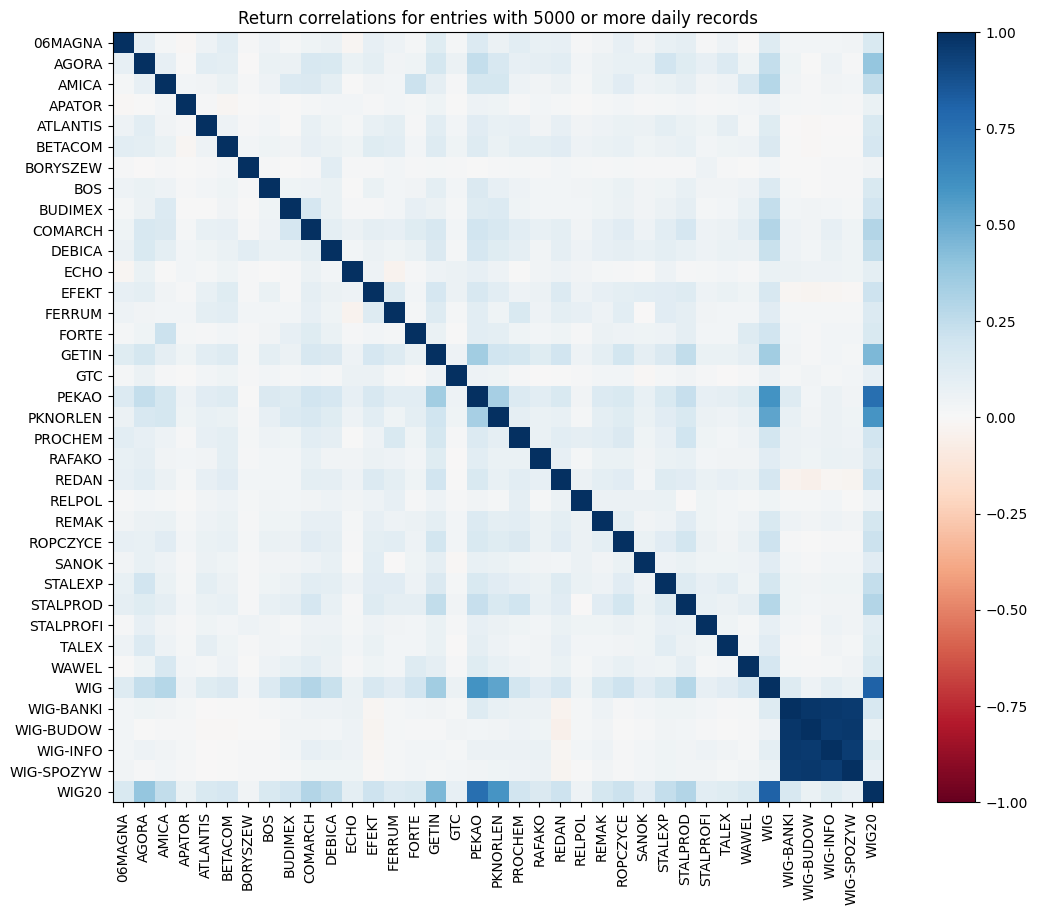

In [3]:
dataframes_dict = get_dataframes(daily_omega)
dataframes = list(dataframes_dict.values())

dataframes_tuple = [(df.rename(columns={"DiffPrevDate": name}), name) for name, df in dataframes_dict.items() if len(df)>=5000]
dataframes, names = zip(*dataframes_tuple)
dataframes = [df.drop(columns=["High"]) for df in dataframes]

d0 = dataframes[0]
for df in dataframes[1:]:
    d0 = pd.merge(d0, df, on=["Date"], how="outer")
print(len(d0))

columns = d0.columns.difference(["Date"])
R= d0[columns].to_numpy()
norm = (~np.isnan(R)).astype('int')

R[np.isnan(R)] = 0
corr = (R.T @ R) / (norm.T @ norm)

plt.figure(figsize=(14, 10))
plt.imshow(corr, cmap='RdBu', interpolation='nearest',vmin=-1, vmax=1)
plt.xticks(np.arange(0, len(columns)), columns, rotation=90)
plt.yticks(np.arange(0, len(columns)), columns, rotation=0)

plt.colorbar()
plt.title('Return correlations for entries with 5000 or more daily records')
